# Decision Tree-2

- You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:


In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.


In [2]:
url = 'https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing'
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### descriptive statistics

In [5]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### visualizations to understand the distribution and relationship

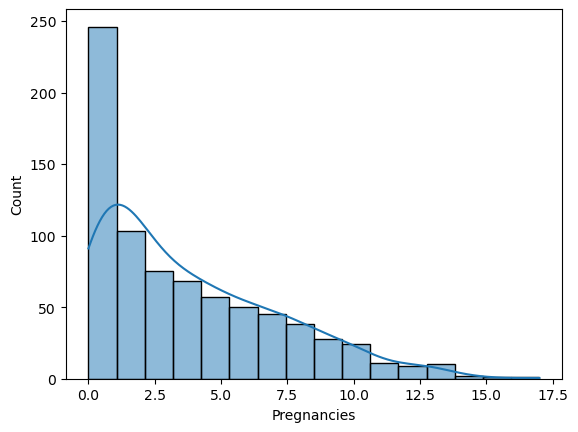

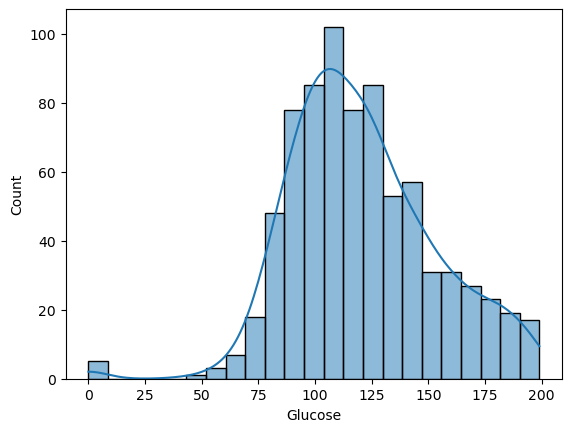

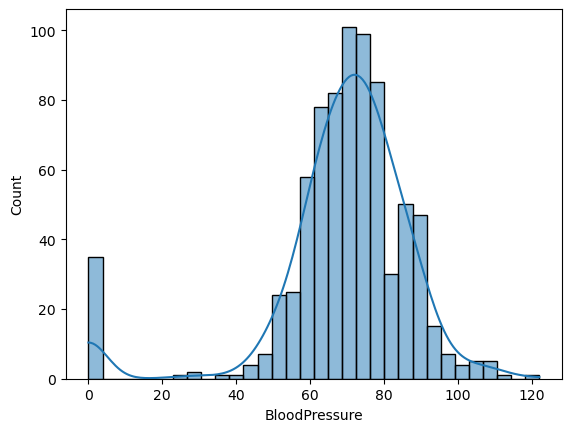

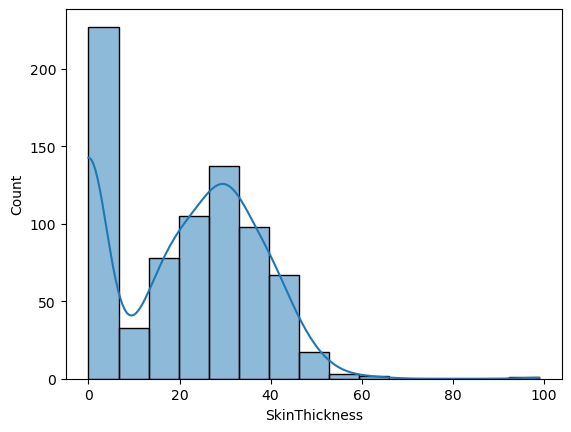

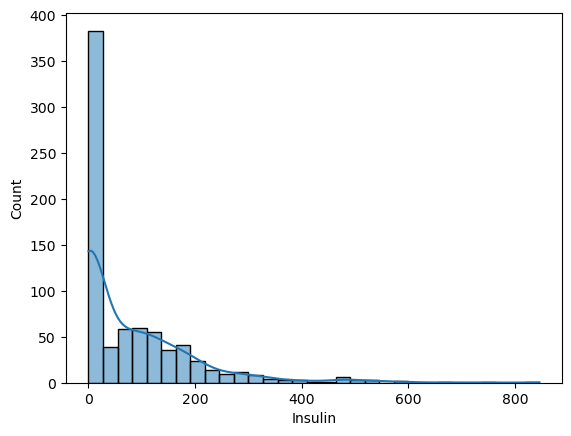

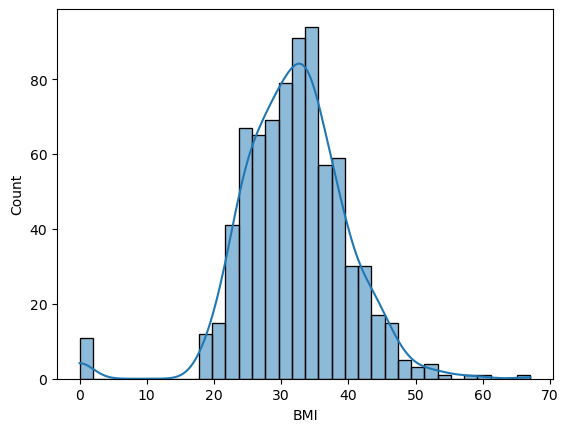

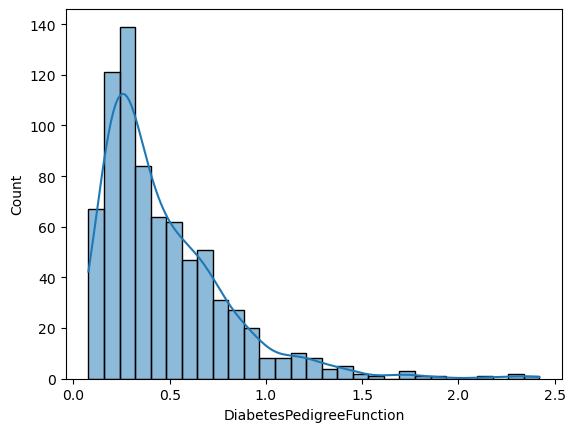

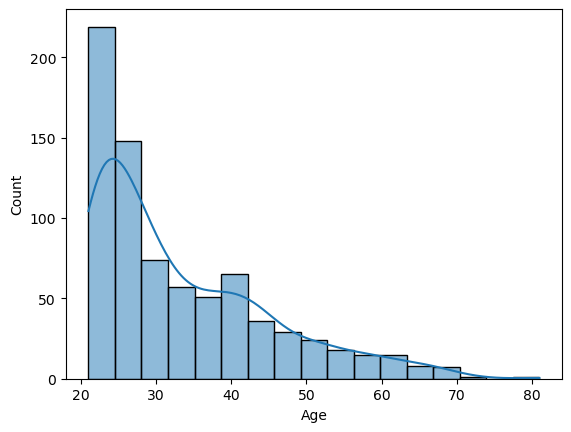

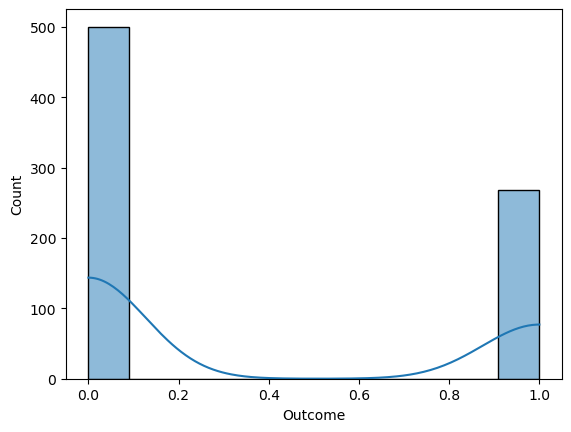

In [6]:
for i in df.columns:
    sns.histplot(df[i], kde = True)
    plt.show()

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

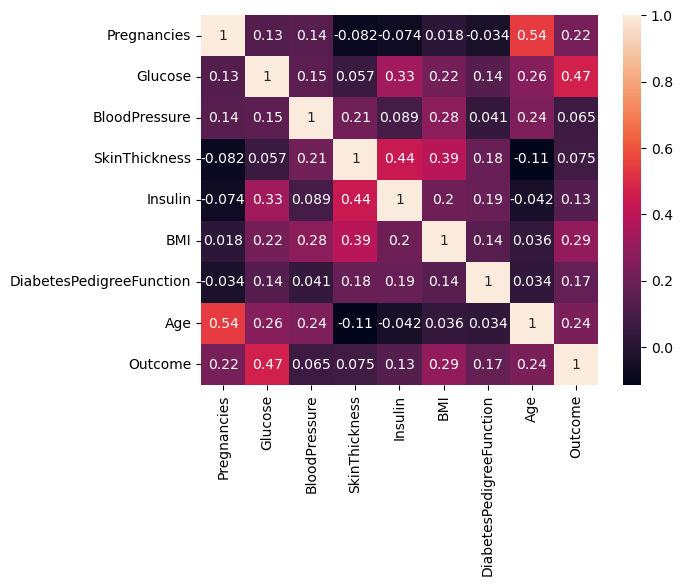

In [8]:
# Correlation heatmap between the variables
sns.heatmap(df.corr(), annot=True)

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values in this data set

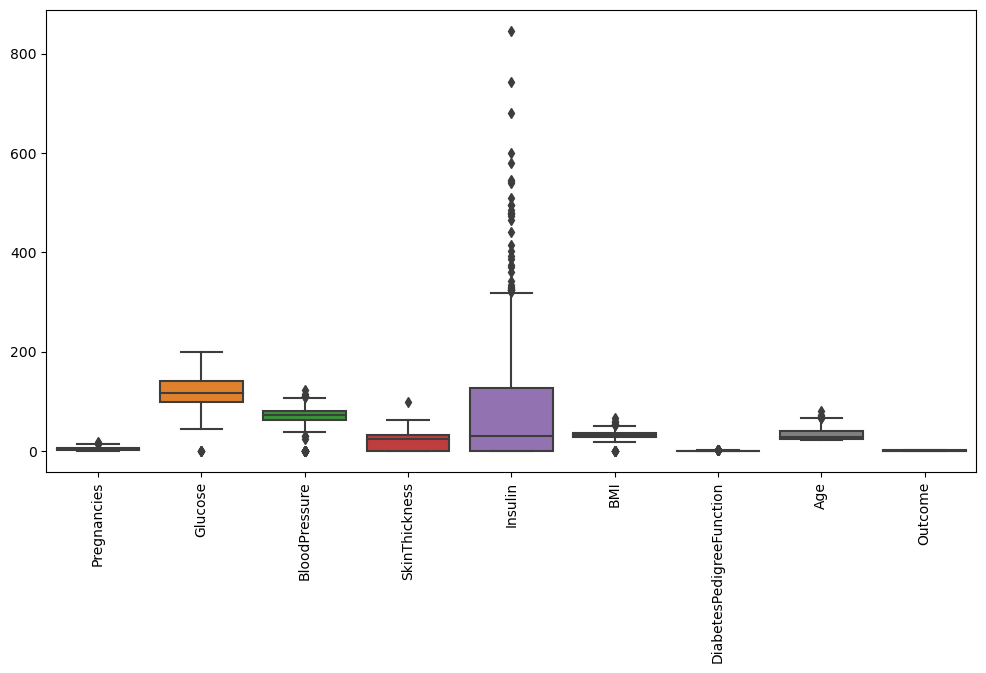

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation ='vertical')
plt.show()

In [12]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
df = df[(z < 2.5).all(axis=1)]

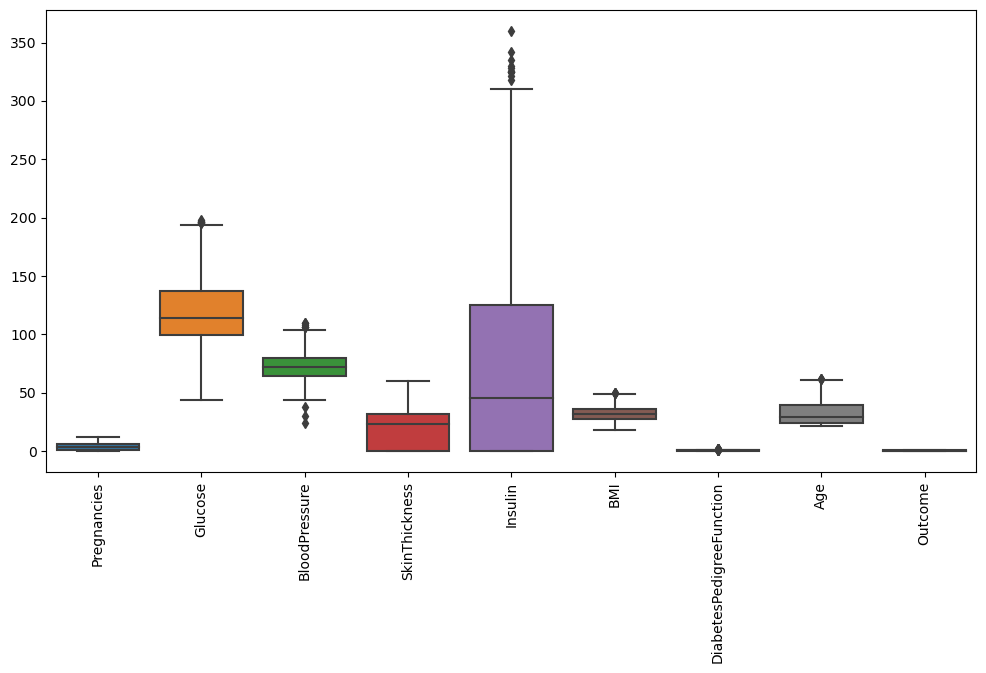

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation ='vertical')
plt.show()

Observation:
- In Insulin feature there are so many outliers in our data set.
- Rest all features do not have that much outliers respect to insulin feature.

Removing outliers:
- We use Z score to removing the outliers in our data set i use threshold value as 2.5 so our dataset loose big outliers and at the same time it has some out liers as well.

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Observation:
- In this dataset we do not have any categorical Variable

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


In [15]:
## Independent and dependent variables.

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((431, 8), (213, 8), (431,), (213,))

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 15, 20]
}

In [23]:
treeclassifier = DecisionTreeClassifier()
clf = GridSearchCV(treeclassifier, param_grid = parameter, cv = 5, scoring = 'accuracy')

In [24]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [25]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20}

In [26]:
model = clf.best_estimator_

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [31]:
# Calculate the accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.704225352112676
Precision: 0.5921052631578947
Recall: 0.5844155844155844
F1 score: 0.5882352941176471


In [32]:
# Calculate the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[105  31]
 [ 32  45]]


### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.


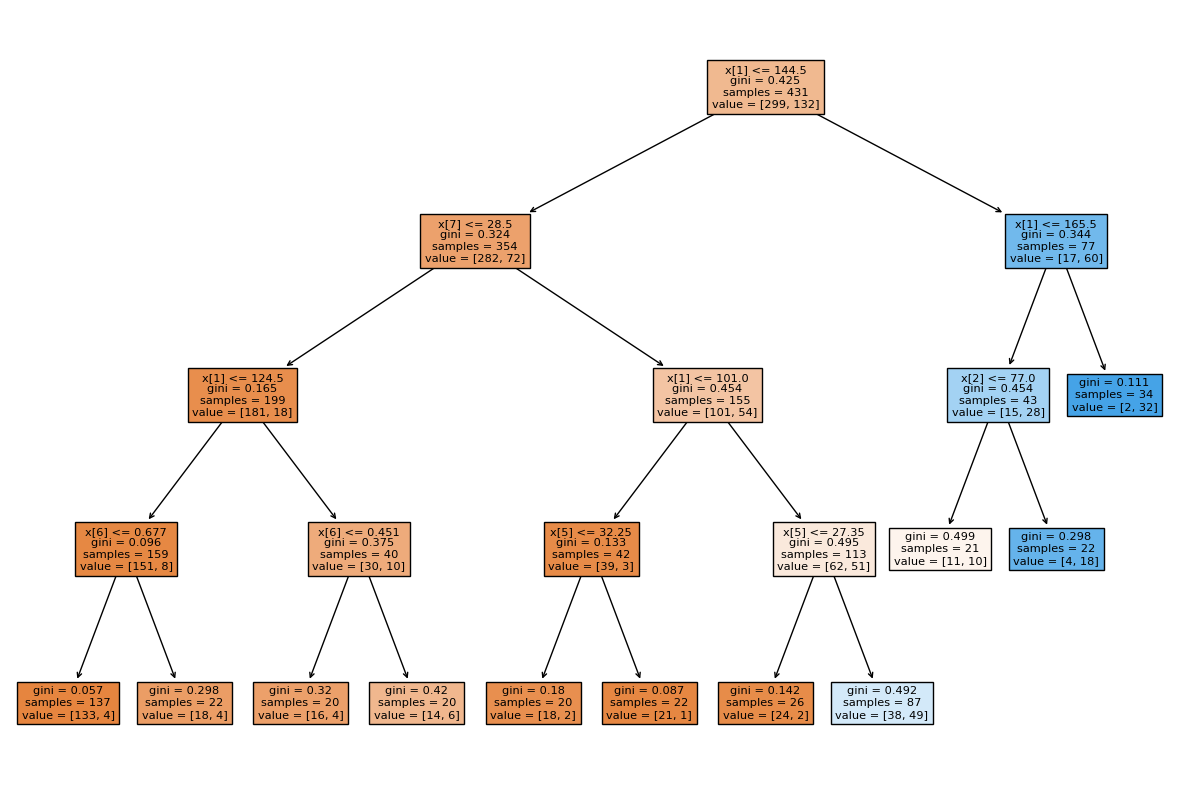

In [33]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True)
plt.show()

By examining the splits, branches, and leaves of the decision tree, we can identify the most important variables and their thresholds.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [34]:
'''

# Load new data
new_data = pd.read_csv("new_data.csv")

# Preprocess the new data
new_data = preprocess_data(new_data)

# Predict the labels of the new data
new_labels = best_model.predict(new_data)

# Evaluate the performance on the new data
new_accuracy = accuracy_score(new_labels, true_labels)
new_precision = precision_score(new_labels, true_labels)
new_recall = recall_score(new_labels, true_labels)
new_f1_score = f1


'''

'\n\n# Load new data\nnew_data = pd.read_csv("new_data.csv")\n\n# Preprocess the new data\nnew_data = preprocess_data(new_data)\n\n# Predict the labels of the new data\nnew_labels = best_model.predict(new_data)\n\n# Evaluate the performance on the new data\nnew_accuracy = accuracy_score(new_labels, true_labels)\nnew_precision = precision_score(new_labels, true_labels)\nnew_recall = recall_score(new_labels, true_labels)\nnew_f1_score = f1\n\n\n'

### I dont know how do i get new data for testing in 7 th question so i write a general code assuming that if i have new data in my system as "new_data.csv". if i do something wrong in any question then please tell me with question number and also tell  my mistake in that particular question.